In [1]:
import sys
sys.path.insert(0, '..')

from battleship.agents import CodeSpotterModel
from battleship.agents import DirectSpotterModel
from battleship.agents import CacheMode
from battleship.run_spotter_benchmarks import load_data, benchmark_on_rounds

df, rounds_questions_dict = load_data(
        stages_path="/home/ubuntu/repo_battleship/temp/gold_annotations_partial.csv",
        rounds_path="/home/ubuntu/repo_battleship/battleship/experiments/collaborative/battleship-final-data/round.csv",
        #goldAnnotations=["answer", "ambiguous", "contextual", "unanswerable"],
    )

print(len(rounds_questions_dict.keys()))

126


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# We'll store the accuracy results in a dictionary:
# Key: language model string
# Value: list of accuracies [DirectSpotter, CodeSpotterModel]
results = {}
QUESTIONS = 20
ROUNDS = 5

cot_list = [True, False]
spotter_models = [CodeSpotterModel]
language_models = ["openai/gpt-4o"]

for llm in language_models:
        results[llm] = []
        for spotter in spotter_models:
                for cot_option in cot_list:
                        print(f"Benchmarking {spotter.__name__} with language model {llm}, COT: {cot_option}")
                        accuracy, failed = benchmark_on_rounds(
                                df=df,
                                rounds_question_ids=rounds_questions_dict,
                                model=spotter,
                                model_string=llm,
                                max_rounds=ROUNDS,
                                max_questions=QUESTIONS,
                                cache_mode=CacheMode.WRITE_ONLY,
                                use_cot=cot_option,
                                use_history=True,
                        )
                        results[llm].append(accuracy)
                        print(f"Accuracy: {accuracy}")

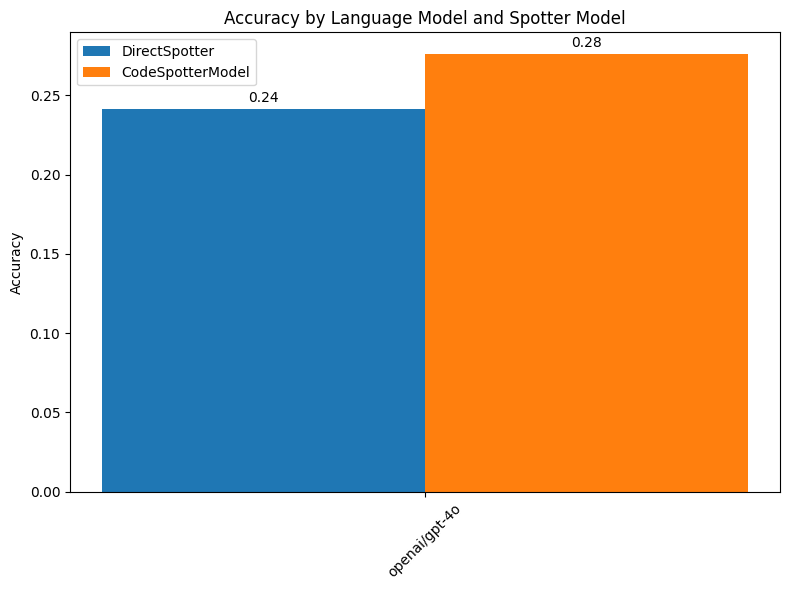

In [3]:
# Prepare data for the plot
labels = language_models
x = np.arange(len(labels))  # positions for language models on x-axis
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(8, 6))

# For each language model, the first element is for DirectSpotter and the second for CodeSpotterModel.
direct = [results[l][0] for l in labels]
code = [results[l][1] for l in labels]


rects1 = ax.bar(x - width/2, direct, width, label='DirectSpotter')
rects2 = ax.bar(x + width/2, code, width, label='CodeSpotterModel')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Language Model and Spotter Model')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

# Annotate bars with the accuracy values.
def autolabel(rects):
        for rect in rects:
                height = rect.get_height()
                ax.annotate(f'{height:.2f}',
                                        xy=(rect.get_x() + rect.get_width() / 2, height),
                                        xytext=(0, 3),  # vertical offset in points
                                        textcoords="offset points",
                                        ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()